
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

Análisis y Visualización de Datos
------

## Trabajo práctico entregable - Parte 1

Grupo 12:
        

*       Ana sofia Turchi
*       Gaston Aguirre Moro
*       Sergio Rafael Nievas
*       Cecilia Alamos

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sea
from sklearn import datasets
sea.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:5]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

---
### **1. Selección de columnas relevantes para el análisis**

Las columnas elegidas para poder hacer nuestro análisis fueron:
'tools_programming_languages' y 'salary_monthly_NETO'

In [4]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

### **2. Seleccionar las filas relevantes para analizar**

Se analizan los valores extremos y erróneos.
Primero se visualizan todos los datos originales del data frame para la columna `salary_monthly_NETO` atraés de un histograma. Esto se realiza para detectar los outliers o valores erróneos y seleccionar las filas más relevantes para el análisis.

Text(0.5, 6.8000000000000185, 'Salario mensual NETO [$]')

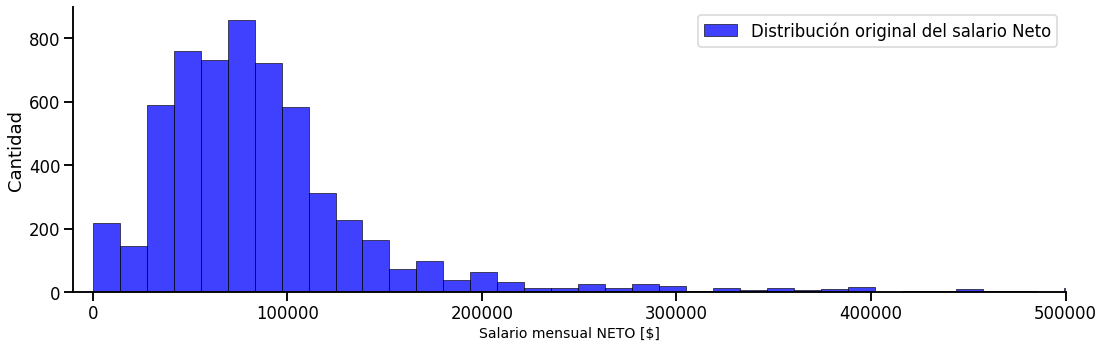

In [5]:
sea.displot(df["salary_monthly_NETO"], aspect=3, bins = 150, color='blue', label='Distribución original del salario Neto') 
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(-10000,500000)
plt.legend()
plt.ylabel("Cantidad")
plt.xlabel('Salario mensual NETO [$]',fontsize=14)

Se observa en el histograma un sesgo hacia la derecha, es decir que la distribución tiene la mayor frecuencia o conteo de casos del lado izquierdo (parte inferior del eje x)

En el siguiente gráfico box plot, se rectifica el sesgo a derecha, para todo el conjunto de datos original, mostrando varios cuantiles, y proporciona más información sobre la forma de la distribución, particularmente en las colas.

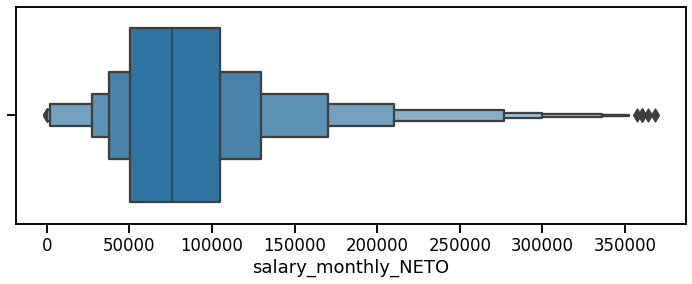

In [6]:
plt.figure(figsize=(12, 4))
max_limit = df['salary_monthly_NETO'].quantile(.98)
sea.boxenplot(x=df[df['salary_monthly_NETO']<max_limit]['salary_monthly_NETO'])

La siguiente tabla muestra los resultados de la estadística descriptiva para los salarios netos de toda la base de datos, con el fin de analizar los valores extremos.

In [7]:
df[['salary_monthly_NETO']].describe().round()

,salary_monthly_NETO
count,5883.0
mean,94908.0
std,96862.0
min,1.0
25%,51480.0
50%,78000.0
75%,106000.0
max,2080000.0


El valor máximo para el salario neto es \$ 2.080.000, es un valor muy elevado por lo que se puede suponer atípico y el valor mínimo es de \$ 1.0 que se sospecha es erróneo.

Calculo de la Mediana y la Moda

In [8]:
df[['salary_monthly_NETO']].median()

salary_monthly_NETO    78000.0
dtype: float64

In [9]:
df[['salary_monthly_NETO']].mode()

,salary_monthly_NETO
0,80000.0


Los valores son:


*  Mediana del salario Neto: \$ 78.000
*   Moda del salario Neto: \$ 80.000

Por lo que se puede decir que la mayor concentración de salarios Netos se da en valores alrededor de los \$ 80.0000.


**Cálculo de los percentíles para la columna de salarios Netos:**

In [10]:
df['salary_monthly_NETO'].quantile([.025, 0.05, .10, .90, .95, .98, .99, .995, .998])

0.025       115.35
0.050     22500.00
0.100     35000.00
0.900    150000.00
0.950    210000.00
0.980    370000.00
0.990    491800.00
0.995    650000.00
0.998    955289.52
Name: salary_monthly_NETO, dtype: float64

Para el año 2020, que es cuando se realizó la encuesta, un valor de \$ 370.000 es un salario muy alto para ese año en la Argentina, entonces conservaremos para nuestra muestra los registros con salarios menores a este número. Al realizar esto sólo perderemos el 2\% de nuestros datos originales, y podemos considerar que esa cantidad es suficientemente pequeña y no afecta a nuestro análisis. 

Text(0.5, 29.065624999999997, 'Salario mensual NETO [$]')

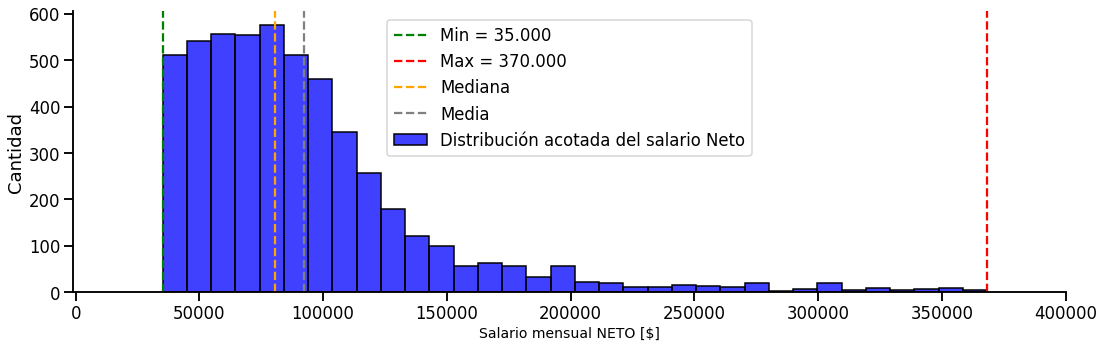

In [11]:
#df_new contiene el data frame acotado del salary_monthly_NETO
#df_new = df[(df["salary_monthly_NETO"] > 35000) & (df["salary_monthly_NETO"] < 370000)]
df_new=df.loc[(df.salary_monthly_NETO<370000) & (df.salary_monthly_NETO>35000)]
#df_new=df.loc[df.salary_monthly_NETO>35000]

#grafica del nuevo data frame acotado
dsp=sea.displot(df_new["salary_monthly_NETO"], aspect=3, bins = 34, color='blue', label='Distribución acotada del salario Neto') 
dsp.refline(x=df_new["salary_monthly_NETO"].min(), color='green', linestyle='--', label="Min = 35.000")
dsp.refline(x=df_new["salary_monthly_NETO"].max(), color='red', linestyle='--', label="Max = 370.000")
dsp.refline(x=df_new["salary_monthly_NETO"].median(), color='orange', linestyle='--', label="Mediana")
dsp.refline(x=df_new["salary_monthly_NETO"].mean(), color='grey', linestyle='--', label="Media")
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(-1000,400000)
plt.legend()
plt.ylabel("Cantidad")
plt.xlabel('Salario mensual NETO [$]',fontsize=14)
#plt.title("Base de datos procesada")

In [12]:
df_new[['salary_monthly_NETO']].describe().round()

,salary_monthly_NETO
count,5173.0
mean,92269.0
std,50397.0
min,35100.0
25%,59000.0
50%,80400.0
75%,108000.0
max,368300.0


In [13]:
df_new.tools_programming_languages

0                                                 Ninguno
1                                HTML, Javascript, Python
2                                                 Ninguno
3       Bash/Shell, C, CSS, HTML, Java, Javascript, PH...
4                  CSS, HTML, Javascript, SQL, TypeScript
                              ...                        
6088                                                 HTML
6089                              Bash/Shell, Python, SQL
6090    .NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...
6091                            Ninguno de los anteriores
6094                            Ninguno de los anteriores
Name: tools_programming_languages, Length: 5173, dtype: object

Con esta tabla podemos analizar el rango de salarios, para definir cuales serán los pertinentes y cuantos registros estaríamos quitando al eliminar todos los salarios que no estén dentro del rango elegido.

# Obtención de la lista con los lenguajes de programación más populares

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



Dado que queremos conocer los cinco lenguajes de programación con salarios que superen la media del salario de todos los encuestados, primero haremos un filtro con cada uno de los lenguajes y luego determinaremos la freuencia de cada uno de estos lenguajes.

Seleccionaremos aquellos cinco lenguajes con los numeros de frecuencia más altos (O sea, aquellos que más se repiten)

In [14]:
df_new.tools_programming_languages[:5]

0                                              Ninguno
1                             HTML, Javascript, Python
2                                              Ninguno
3    Bash/Shell, C, CSS, HTML, Java, Javascript, PH...
4               CSS, HTML, Javascript, SQL, TypeScript
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [15]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df_new.loc[:, 'cured_programming_languages'] = df_new.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df_new.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df_new[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [16]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:5]


,language,frequency
0,javascript,2118
1,sql,1861
2,html,1553
3,python,1286
4,java,1277


In [17]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})


In [18]:
language_count=language_count[language_count['frequency']>=30]
language_list = language_count['language'].tolist()

In [19]:
df_lang = df_lang[df_lang.programming_language.isin(language_list)]

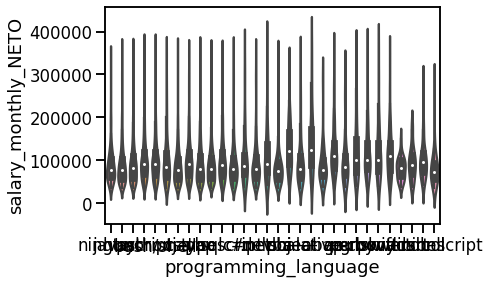

In [20]:
sea.violinplot(data=df_lang, x=df_lang.programming_language,y=df_lang.salary_monthly_NETO)
#df_lang.head()

Una vez separados los tipos de lenguaje por una fila individual, podemos concluir que los lenguajes con mayor numero de frecuencia son:
 **Javascript, sql, html, python y java**

## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [21]:
# Para poder sacar las medidas de tendencia central más adelante, 
# necesitaremos extraer de nuestro dataset aquellos lenguajes que nos interesan: 
# javascript, sql, html, python y javascript.

interesting_languages = ["python","sql","javascript","html","java"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
3,html,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,java,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."


In [22]:
# Tamaño del dataset filtrado
filtered_df_lang.shape

(8095, 4)

In [23]:
# Le otorgamos un nombre a nuestra variable para poder manipular mejor nuestros datos
df_processed_data = filtered_df_lang[['programming_language', 'salary_monthly_NETO']]



In [24]:
# Luego, utilizamos la funcion describe para obtener las principales medidas estadisticas. 
# Con esta funcion podemos observar posibles outliers ya que ninguna persona asalariada puede 
# tener un salario de $1 o 2 Millones de pesos mensuales

df_processed_data.groupby('programming_language')['salary_monthly_NETO'].describe().round(decimals = 2)

,count,mean,std,min,25%,50%,75%,max
programming_language,,,,,,,,
html,1553.0,89768.51,51558.45,35674.0,56440.0,78000.0,103000.0,360000.0
java,1277.0,99973.80,51393.81,35200.0,65000.0,90000.0,120000.0,357000.0
javascript,2118.0,95986.21,56582.96,35500.0,59000.0,82085.0,110000.0,360000.0
python,1286.0,103299.60,55369.06,35500.0,67000.0,90000.0,120000.0,368300.0
sql,1861.0,89933.65,47731.14,35200.0,58000.0,80000.0,105000.0,360000.0


**GRAFICO DE CAJA:**

En el siguiente grafico de caja, podemos confirmar en base a las observaciones que Python tiene una dispersion de salarios menor al resto de los lenguajes más frecuentes

Text(0.5, 1.0, 'Distribución de los salarios según el lenguaje de programación')

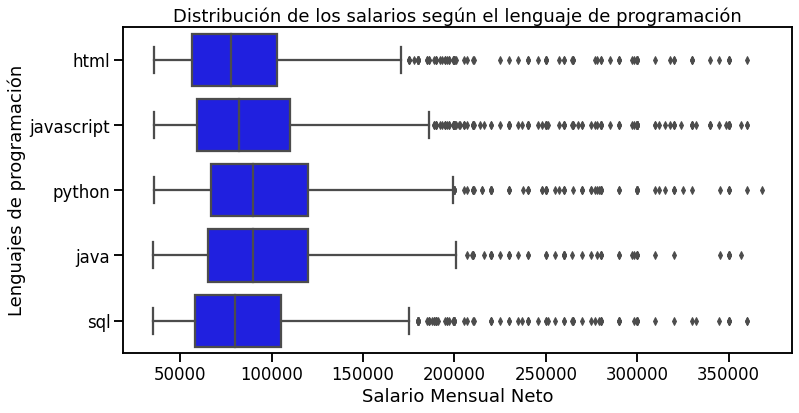

In [25]:
plt.figure(figsize=(12, 6))
sea.boxplot(data=df_processed_data, x=df_processed_data.salary_monthly_NETO, y=df_processed_data.programming_language,
                color='blue')
#sea.boxplot(data=df_processed_data, x=df_processed_data.salary_monthly_NETO, y=df_processed_data.programming_language,
#                color='blue')
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('Lenguajes de programación')
plt.xlabel('Salario Mensual Neto')
plt.title('Distribución de los salarios según el lenguaje de programación')



**GRAFICO DE VIOLIN**

Otra forma de visualizar la dispersión de salarios es por medio del gráfico de violin

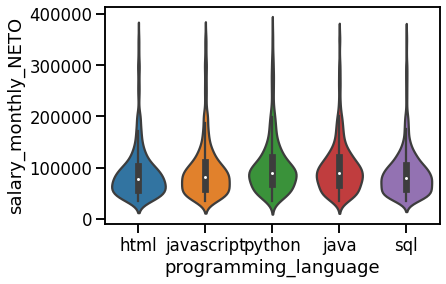

In [26]:
sea.violinplot(data=df_processed_data, x=df_processed_data.programming_language,y=df_processed_data.salary_monthly_NETO)
   

In [27]:
#sea.distplot(df_processed_data["salary_monthly_NETO"], x=df_processed_data.programming_language, kde=False, rug=True, bins=100)


In [28]:
#sea.displot(df_processed_data["salary_monthly_NETO"], aspect=3, bins = 150, color='blue', label='Distribución original del salario Neto') 

In [29]:
df_processed_data['salary_monthly_NETO'].median()



83000.0

In [30]:
df_processed_data['salary_monthly_NETO'].describe().round()

count      8095.0
mean      95193.0
std       52915.0
min       35200.0
25%       60000.0
50%       83000.0
75%      110000.0
max      368300.0
Name: salary_monthly_NETO, dtype: float64

In [31]:
df_processed_data['salary_monthly_NETO'].mode()


0    80000.0
dtype: float64

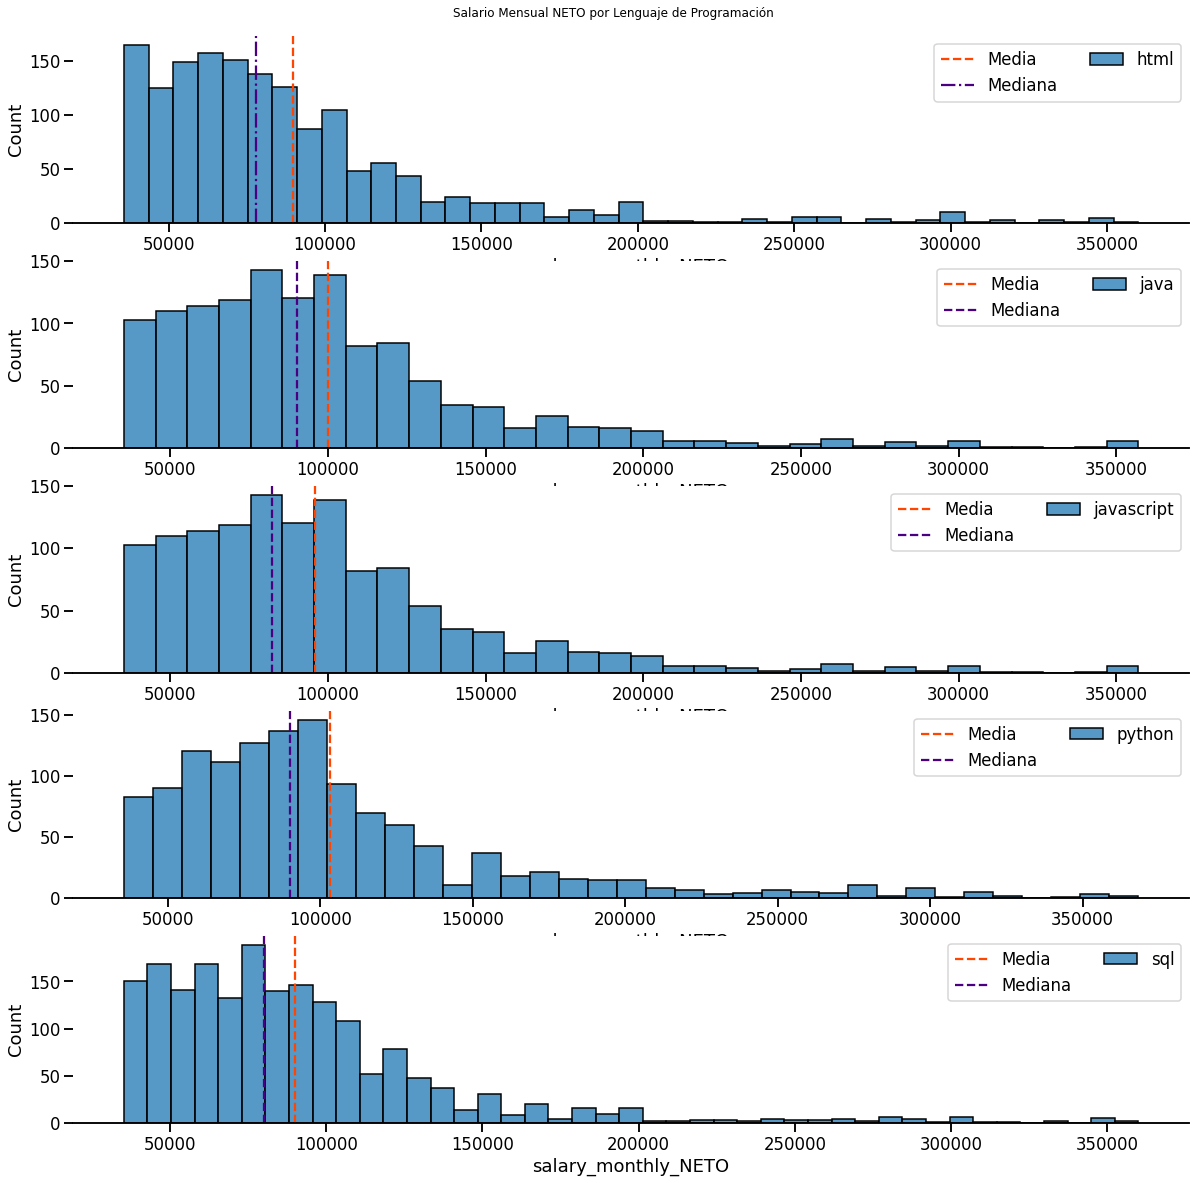

In [32]:
from matplotlib.patches import BoxStyle
from numpy.core.fromnumeric import size

#fig, axes = plt.subplots(nrows=5, figsize=(16, 10)) 
fig, axes = plt.subplots(nrows=5, figsize=(20, 20)) 


df_html = df_processed_data[df_processed_data['programming_language']=='html']
sea.histplot(df_html.salary_monthly_NETO, ax=axes[0],label='html')
axes[0].axvline(df_html.salary_monthly_NETO.mean(), color='orangered', linestyle='--', label='Media')
axes[0].axvline(df_html.salary_monthly_NETO.median(), color='indigo', linestyle='-.', label='Mediana') 
#axes[0].axvline(df_html.salary_monthly_NETO.mode(), color='indigo', linestyle='-.', label='Moda') 

df_java = df_processed_data[df_processed_data['programming_language']=='java']
sea.histplot(df_java.salary_monthly_NETO, ax=axes[1],label='java' )
axes[1].axvline(df_java.salary_monthly_NETO.mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(df_java.salary_monthly_NETO.median(), color='indigo',
            linestyle='--', label='Mediana')
#axes[1].axvline(df_java.salary_monthly_NETO.mode(), color='indigo',
#            linestyle='--', label='Moda')

df_javascript = df_processed_data[df_processed_data['programming_language']=='javascript']
sea.histplot(df_java.salary_monthly_NETO, ax=axes[2],label= 'javascript')
axes[2].axvline(df_javascript.salary_monthly_NETO.mean(), color='orangered',
            linestyle='--', label='Media')
axes[2].axvline(df_javascript.salary_monthly_NETO.median(), color='indigo',
            linestyle='--', label='Mediana')
#axes[2].axvline(df_javascript.salary_monthly_NETO.mode(), color='indigo',
#            linestyle='--', label='Moda')

df_python = df_processed_data[df_processed_data['programming_language']=='python']
sea.histplot(df_python.salary_monthly_NETO, ax=axes[3],label= 'python')
axes[3].axvline(df_python.salary_monthly_NETO.mean(), color='orangered',
            linestyle='--', label='Media')
axes[3].axvline(df_python.salary_monthly_NETO.median(), color='indigo',
            linestyle='--', label='Mediana')
#axes[3].axvline(df_python.salary_monthly_NETO.mode(), color='indigo',
#            linestyle='--', label='Moda')

df_sql = df_processed_data[df_processed_data['programming_language']=='sql']
sea.histplot(df_sql.salary_monthly_NETO, ax=axes[4],label='sql')
axes[4].axvline(df_sql.salary_monthly_NETO.mean(), color='orangered',
            linestyle='--', label='Media')
axes[4].axvline(df_sql.salary_monthly_NETO.median(), color='indigo',
            linestyle='--', label='Mediana')
#axes[4].axvline(df_sql.salary_monthly_NETO.mode(), color='indigo',
#            linestyle='--', label='Moda')

plt.suptitle('Salario Mensual NETO por Lenguaje de Programación', y=0.90)
axes[0].legend( ncol=2, loc='upper right')
axes[1].legend( ncol=2, loc='upper right')
axes[2].legend( ncol=2, loc='upper right')
axes[3].legend( ncol=2, loc='upper right')
axes[4].legend( ncol=2, loc='upper right')
sea.despine(left=True)



In [33]:
df_processed_data.groupby('programming_language')['salary_monthly_NETO'].quantile([0, .25, .5, .75, 1])



programming_language      
html                  0.00     35674.0
                      0.25     56440.0
                      0.50     78000.0
                      0.75    103000.0
                      1.00    360000.0
java                  0.00     35200.0
                      0.25     65000.0
                      0.50     90000.0
                      0.75    120000.0
                      1.00    357000.0
javascript            0.00     35500.0
                      0.25     59000.0
                      0.50     82085.0
                      0.75    110000.0
                      1.00    360000.0
python                0.00     35500.0
                      0.25     67000.0
                      0.50     90000.0
                      0.75    120000.0
                      1.00    368300.0
sql                   0.00     35200.0
                      0.25     58000.0
                      0.50     80000.0
                      0.75    105000.0
                      1.00    360000.

In [34]:
#sea.kdeplot('html', shade=True)
#sea.kdeplot('sql', shade=True)
#plt.legend()
#plt.show()

---
### **1. Selección de columnas relevantes para el análisis**

Las columnas elegidas para poder hacer nuestro análisis fueron:
'tools_programming_languages' y 'salary_monthly_NETO'

In [35]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

### **2. Seleccionar las filas relevantes para analizar**

Se analizan los valores extremos y erróneos.
Primero se visualizan todos los datos originales del data frame para la columna `salary_monthly_NETO` atraés de un histograma. Esto se realiza para detectar los outliers o valores erróneos y seleccionar las filas más relevantes para el análisis.

Text(0.5, 6.8000000000000185, 'Salario mensual NETO [$]')

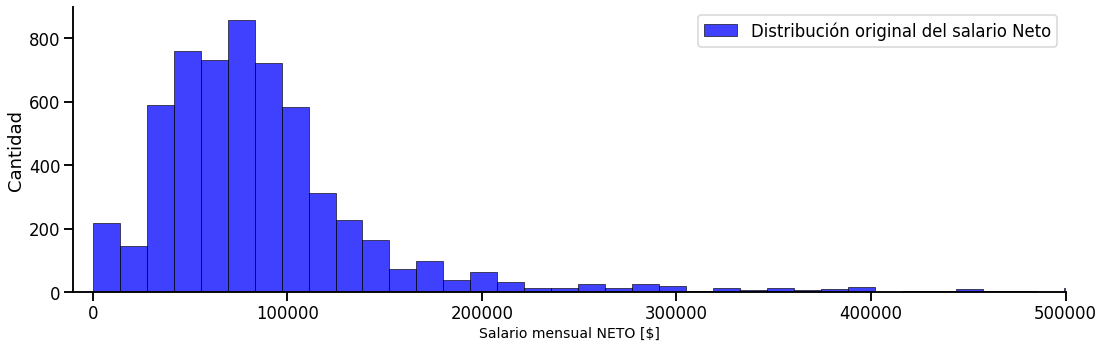

In [36]:
sea.displot(df["salary_monthly_NETO"], aspect=3, bins = 150, color='blue', label='Distribución original del salario Neto') 
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(-10000,500000)
plt.legend()
plt.ylabel("Cantidad")
plt.xlabel('Salario mensual NETO [$]',fontsize=14)

Se observa en el histograma un sesgo hacia la derecha, es decir que la distribución tiene la mayor frecuencia o conteo de casos del lado izquierdo (parte inferior del eje x)

La siguiente tabla muestra los resultados de la estadística descriptiva para los salarios netos de toda la base de datos, con el fin de analizar los valores extremos.

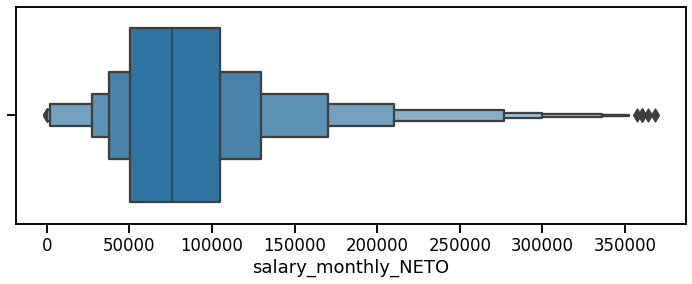

In [37]:
plt.figure(figsize=(12, 4))
max_limit = df['salary_monthly_NETO'].quantile(.98)
sea.boxenplot(x=df[df['salary_monthly_NETO']<max_limit]['salary_monthly_NETO'])

In [38]:
df[['salary_monthly_NETO']].describe().round()

,salary_monthly_NETO
count,5883.0
mean,94908.0
std,96862.0
min,1.0
25%,51480.0
50%,78000.0
75%,106000.0
max,2080000.0


El valor máximo para el salario neto es \$ 2.080.000, es un valor muy elevado por lo que se puede suponer atípico y el valor mínimo es de \$ 1.0 que se sospecha es erróneo.

Calculo de la Mediana y la Moda

In [39]:
df[['salary_monthly_NETO']].median()

salary_monthly_NETO    78000.0
dtype: float64

In [40]:
df[['salary_monthly_NETO']].mode()

,salary_monthly_NETO
0,80000.0


Los valores son:


*  Mediana del salario Neto: \$ 78.000
*   Moda del salario Neto: \$ 80.000

Por lo que se puede decir que la mayor concentración de salarios Netos se da en valores alrededor de los \$ 80.0000.


**Cálculo de los percentíles para la columna de salarios Netos:**

In [41]:
df['salary_monthly_NETO'].quantile([.025, 0.05, .10, .90, .95, .98, .99, .995, .998])

0.025       115.35
0.050     22500.00
0.100     35000.00
0.900    150000.00
0.950    210000.00
0.980    370000.00
0.990    491800.00
0.995    650000.00
0.998    955289.52
Name: salary_monthly_NETO, dtype: float64

Para el año 2020, que es cuando se realizó la encuesta, un valor de \$ 370.000 es un salario muy alto para ese año en la Argentina, entonces conservaremos para nuestra muestra los registros con salarios menores a este número. Al realizar esto sólo perderemos el 2\% de nuestros datos originales, y podemos considerar que esa cantidad es suficientemente pequeña y no afecta a nuestro análisis. 

Text(0.5, 29.065624999999997, 'Salario mensual NETO [$]')

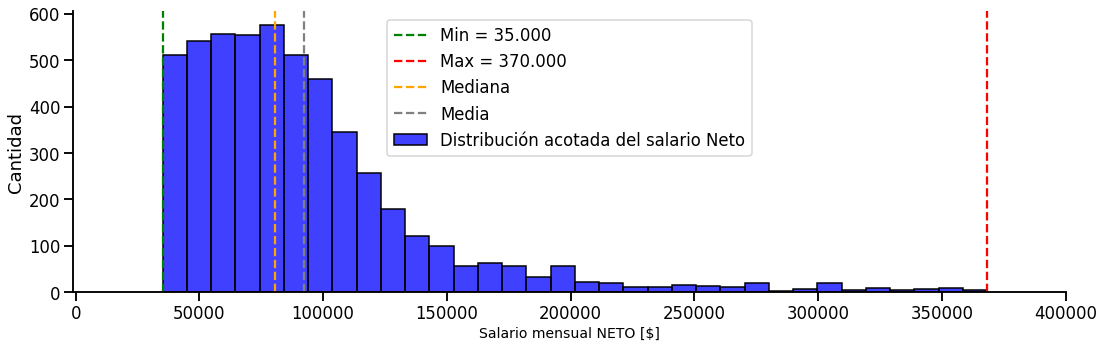

In [42]:
#df_new contiene el data frame acotado del salary_monthly_NETO
#df_new = df[(df["salary_monthly_NETO"] > 35000) & (df["salary_monthly_NETO"] < 370000)]
df_new=df.loc[(df.salary_monthly_NETO<370000) & (df.salary_monthly_NETO>35000)]
#df_new=df.loc[df.salary_monthly_NETO>35000]

#grafica del nuevo data frame acotado
dsp=sea.displot(df_new["salary_monthly_NETO"], aspect=3, bins = 34, color='blue', label='Distribución acotada del salario Neto') 
dsp.refline(x=df_new["salary_monthly_NETO"].min(), color='green', linestyle='--', label="Min = 35.000")
dsp.refline(x=df_new["salary_monthly_NETO"].max(), color='red', linestyle='--', label="Max = 370.000")
dsp.refline(x=df_new["salary_monthly_NETO"].median(), color='orange', linestyle='--', label="Mediana")
dsp.refline(x=df_new["salary_monthly_NETO"].mean(), color='grey', linestyle='--', label="Media")
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(-1000,400000)
plt.legend()
plt.ylabel("Cantidad")
plt.xlabel('Salario mensual NETO [$]',fontsize=14)
#plt.title("Base de datos procesada")

In [43]:
df_new[['salary_monthly_NETO']].describe().round()

,salary_monthly_NETO
count,5173.0
mean,92269.0
std,50397.0
min,35100.0
25%,59000.0
50%,80400.0
75%,108000.0
max,368300.0


In [44]:
df_new.tools_programming_languages

0                                                 Ninguno
1                                HTML, Javascript, Python
2                                                 Ninguno
3       Bash/Shell, C, CSS, HTML, Java, Javascript, PH...
4                  CSS, HTML, Javascript, SQL, TypeScript
                              ...                        
6088                                                 HTML
6089                              Bash/Shell, Python, SQL
6090    .NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...
6091                            Ninguno de los anteriores
6094                            Ninguno de los anteriores
Name: tools_programming_languages, Length: 5173, dtype: object

Con esta tabla podemos analizar el rango de salarios, para definir cuales serán los pertinentes y cuantos registros estaríamos quitando al eliminar todos los salarios que no estén dentro del rango elegido.

# Obtención de la lista con los lenguajes de programación más populares

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



Dado que queremos conocer los cinco lenguajes de programación con salarios que superen la media del salario de todos los encuestados, primero haremos un filtro con cada uno de los lenguajes y luego determinaremos la freuencia de cada uno de estos lenguajes.

Seleccionaremos aquellos cinco lenguajes con los numeros de frecuencia más altos (O sea, aquellos que más se repiten)

In [45]:
df_new.tools_programming_languages[:5]

0                                              Ninguno
1                             HTML, Javascript, Python
2                                              Ninguno
3    Bash/Shell, C, CSS, HTML, Java, Javascript, PH...
4               CSS, HTML, Javascript, SQL, TypeScript
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [46]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
pd.set_option('mode.chained_assignment', None)
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df_new.loc[:,'cured_programming_languages'] = df_new.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df_new.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df_new[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [47]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:5]

,language,frequency
0,javascript,2118
1,sql,1861
2,html,1553
3,python,1286
4,java,1277


Una vez separados los tipos de lenguaje por una fila individual, podemos concluir que los lenguajes con mayor número de frecuencia son:
 **Javascript, sql, html, python y java**

 En el siguiente figura se muestra una representación gráfica de los 5 lenguajes más populares.

<Figure size 720x432 with 0 Axes>

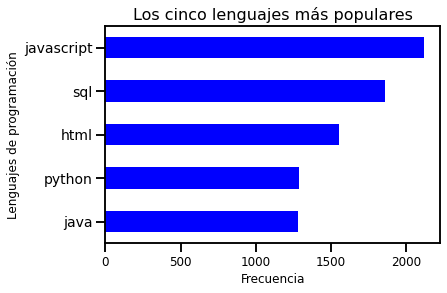

In [48]:
# Grafico con los 5 lenguajes más populares
language_pop=language_count[:5]
language_pop=language_pop.sort_values(by=['frequency'], ascending=True)
plt.figure(figsize=(10,6))
ax = language_pop.plot.barh(rot=0, x='language',color=['blue'])
plt.title('Los cinco lenguajes más populares', fontsize=16) #, fontstyle='italic')
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Lenguajes de programación', fontsize=12)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
ax.get_legend().remove()

# Pregunta inicial reformulada:

Para nuestro análisis se reformula la pregunta a la siguiente:

**Entre los 5 lenguajes de programación más populares, ¿cuál es el mejor pago?**

Ya que del data frame original utilizamos los 5 lenguajes con mayor frecuencia y de esa muestra destacamos el que está asociado al mejor salario.

## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [49]:
# Para poder sacar las medidas de tendencia central más adelante, 
# necesitaremos extraer de nuestro dataset aquellos lenguajes que nos interesan: 
# javascript, sql, html, python y javascript.

interesting_languages = ["python","sql","javascript","html","java"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
3,html,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,java,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."


In [50]:
# Le otorgamos un nombre a nuestra variable para poder manipular mejor nuestros datos
df_processed_data = filtered_df_lang[['programming_language', 'salary_monthly_NETO']]

In [51]:
# Luego, utilizamos la funcion describe para obtener las principales medidas estadisticas. 
# Con esta funcion podemos observar posibles outliers ya que ninguna persona asalariada puede 
# tener un salario de $1 o 2 Millones de pesos mensuales

df_processed_data.groupby('programming_language')['salary_monthly_NETO'].describe().round(decimals = 2)

,count,mean,std,min,25%,50%,75%,max
programming_language,,,,,,,,
html,1553.0,89768.51,51558.45,35674.0,56440.0,78000.0,103000.0,360000.0
java,1277.0,99973.80,51393.81,35200.0,65000.0,90000.0,120000.0,357000.0
javascript,2118.0,95986.21,56582.96,35500.0,59000.0,82085.0,110000.0,360000.0
python,1286.0,103299.60,55369.06,35500.0,67000.0,90000.0,120000.0,368300.0
sql,1861.0,89933.65,47731.14,35200.0,58000.0,80000.0,105000.0,360000.0


**GRAFICO DE CAJA:**

En el siguiente grafico de caja, se representa la distribución de los salarios según el lenguaje de programación y podemos observar que la distribución y la mediana para Python y Java son muy similares, con un pequeño desplazamiento a derecha del cuartil inferior en Python. 

También se puede decir, en base a las observaciones que Python tiene una dispersion de salarios menor al resto de los lenguajes más frecuentes.

Por lo tanto se elige a Python como el lenguaje asociado al mejor salario, entre estos 5 lenguajes de programación más populares.

Text(0.5, 1.0, 'Distribución de los salarios según el lenguaje de programación')

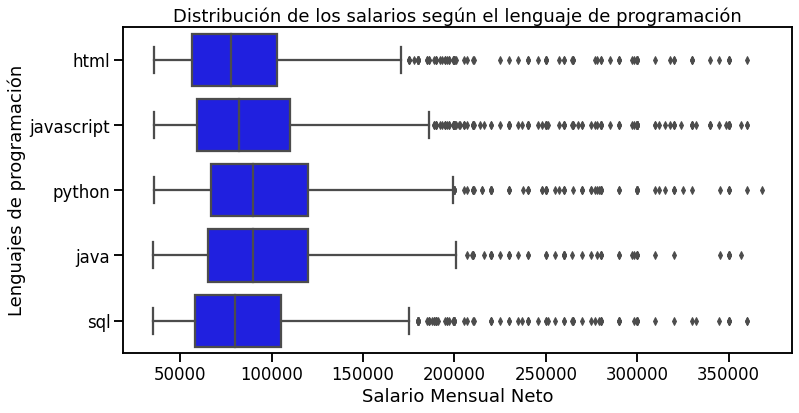

In [52]:
plt.figure(figsize=(12, 6))
sea.boxplot(data=df_processed_data, x=df_processed_data.salary_monthly_NETO, y=df_processed_data.programming_language,
                color='blue')
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('Lenguajes de programación')
plt.xlabel('Salario Mensual Neto')
plt.title('Distribución de los salarios según el lenguaje de programación')

**GRAFICO DE VIOLIN**

Otra forma de visualizar la dispersión de salarios es por medio del gráfico de violin. Donde se confirma la distribución favorable para el lenguaje Python.

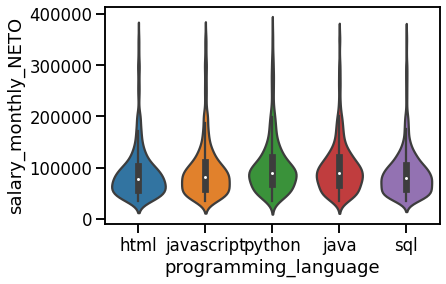

In [53]:
sea.violinplot(data=df_processed_data, x=df_processed_data.programming_language,y=df_processed_data.salary_monthly_NETO)
   

**Conclusión del Ejercicio 1:**

Entre los 5 lenguajes de programación más populares el mejor pago es Python seguido muy de cerca por Java. 

El análisis se realizó teniendo en cuenta el Salario Mensual Neto para una muestra acotada entre los valores de 35.000 y 370.000 pesos de los datos originales, filtrando luego los 5 lenguajes con mayor frecuencia, con esas condiciones y criterios se llegó a la conclusión antes nombrada.

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

In [54]:
interesting_data = ["profile_years_experience","salary_monthly_BRUTO","salary_monthly_NETO"\
                       ,"profile_gender","profile_studies_level"]
df_selected = df[interesting_data]
df_selected.head(3)

,profile_years_experience,salary_monthly_BRUTO,salary_monthly_NETO,profile_gender,profile_studies_level
0,3.0,53000.0,43000.0,Mujer,Universitario
1,5.0,79000.0,63000.0,Hombre,Universitario
2,2.0,160000.0,127000.0,Mujer,Secundario


**Para decidir cuáles filas son relevantes para el análisis primero debemos explorar los datos y decidir si debemos  eliminar valores extremos y erróneos, o si es necesario enfocar nuestro análisis en la determinación de sub-poblaciones.**


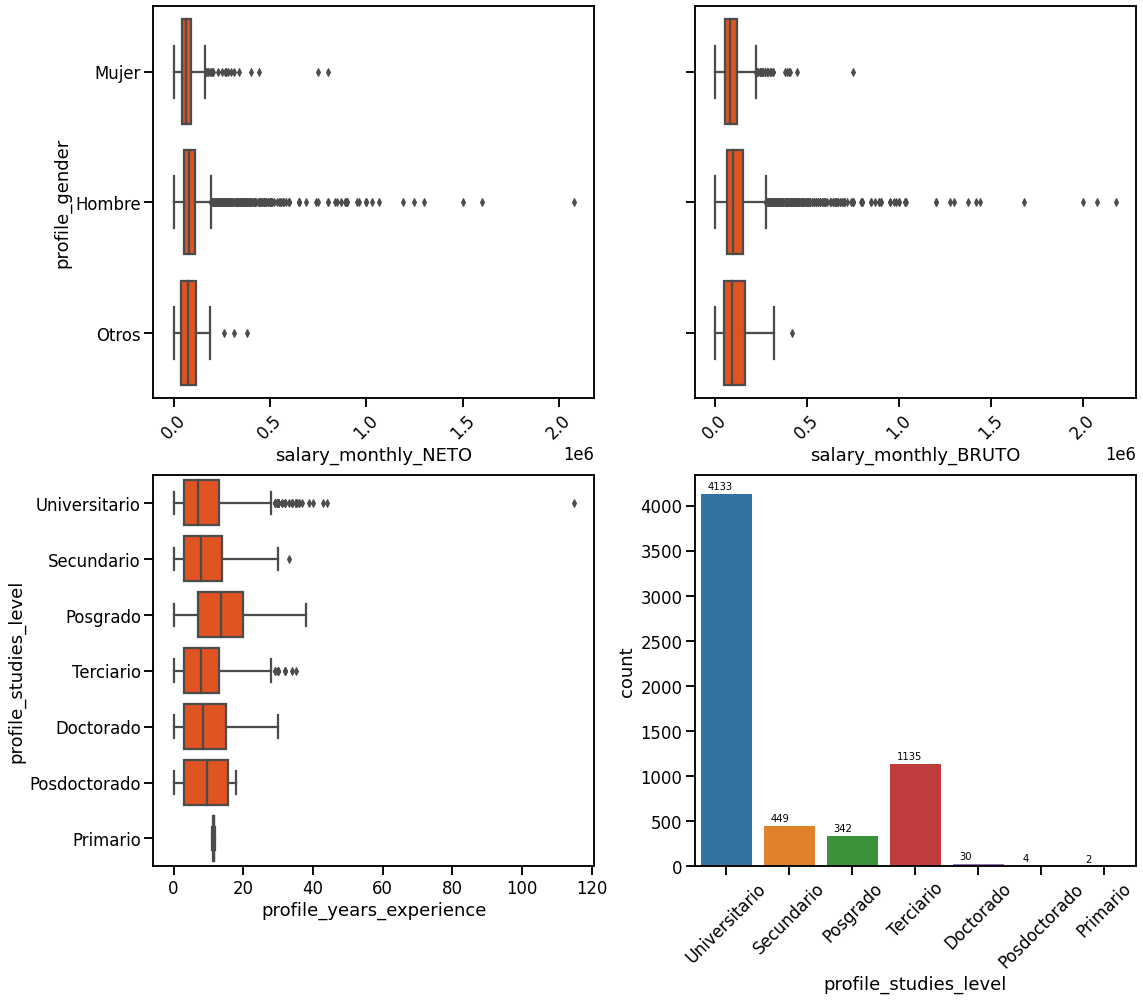

In [55]:
# Exploramos nuestros datos:

fig, axes = plt.subplots(2, 2,figsize=(16,14))

sea.boxplot(data=df_selected, x='salary_monthly_NETO', y='profile_gender'\
            ,color='orangered',ax=axes[0,0])
sea.boxplot(data=df_selected, x='salary_monthly_BRUTO', y='profile_gender'\
            ,color='orangered',ax=axes[0,1])

sea.boxplot(data=df_selected, x='profile_years_experience', y='profile_studies_level',\
            color='orangered',ax=axes[1,0])

ax0 = sea.countplot(data=df_selected,x='profile_studies_level',ax=axes[1,1])

axes[0][0].tick_params(axis='x', rotation=45)
axes[0][1].tick_params(axis='x', rotation=45)    
axes[1][1].tick_params(axis='x', rotation=45)

axes[0,1].set_ylabel('')
axes[0,1].set(yticklabels=[])

fig.tight_layout()

for p in ax0.patches:
        ax0.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.show()


A primera vista podemos observar algunas inconsistencias en nuestros datos por ejemplo:

Se puede visualizar que hay programadores con salarios por debajo del salario mínimo,incluso 0 pesos
Tambien, podemos ver que hay programadores con salarios superiores 1000000 de pesos tanto en salario neto como en bruto.
En cuanto a los años de experiencia, se pueden ver programadores con mas de 100 años de experiencia.
y por otro lado, en relación a los niveles de estudio, tenemos a aquellos programadores con 'Posdoctorado' y nivel de educación 'Primario' que tienen sólo entre 2 y 4 counts, respectivamente. Con lo cual no son relevantes para nuestro análisis y podemos limpiarlos de nuestro data set:


In [56]:
def clean_outliers_sd(dataset, column_name, k):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_data = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        np.abs(interesting_data - interesting_data.mean()) <= (k * interesting_data.std()))
    return dataset[mask_outlier]

In [57]:
# limpiamos los outliers del salario neto y bruto quedándonos sólo aquellos que están dentro de 2.5-sigma,
# lo cual equivale a más del 95% de los datos
df_selected = clean_outliers_sd(df_selected, 'salary_monthly_NETO',k=2.5)
df_selected = clean_outliers_sd(df_selected, 'salary_monthly_BRUTO',k=2.5)

# limpiamos los outliers de los años de experiencia a 3-sigma
df_selected = clean_outliers_sd(df_selected, 'profile_years_experience',k=3.0)

# eliminamos los niveles de estudios 'Posdoctorado' y 'Primario' por tener muy pocos counts
df_selected = df_selected.drop(df_selected[(df_selected.profile_studies_level == "Primario") | \
                             (df_selected.profile_studies_level == "Posdoctorado")].index)

# eliminamos las filas que tienen un salario menor a $20000, tanto bruto como neto
df_selected = df_selected[(df_selected['salary_monthly_NETO']>20000) \
                          & (df_selected['salary_monthly_BRUTO']>20000)]

**AHORA ANALIZAREMOS NUESTROS DATOS YA CURADOS:**

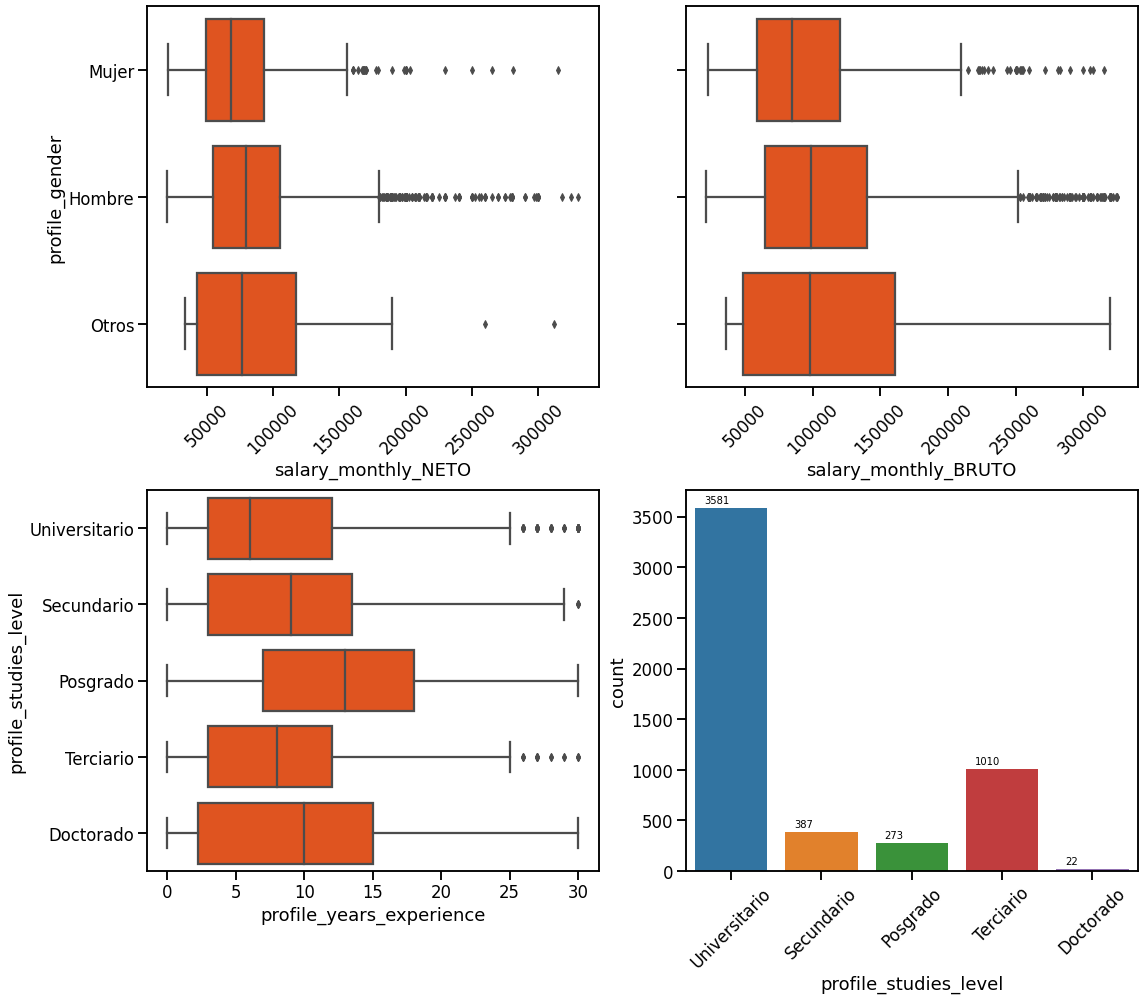

In [58]:
fig, axes = plt.subplots(2, 2,figsize=(16,14))

sea.boxplot(data=df_selected, x='salary_monthly_NETO', y='profile_gender'\
            ,color='orangered',ax=axes[0,0])
sea.boxplot(data=df_selected, x='salary_monthly_BRUTO', y='profile_gender'\
            ,color='orangered',ax=axes[0,1])

sea.boxplot(data=df_selected, x='profile_years_experience', y='profile_studies_level',\
            color='orangered',ax=axes[1,0])

ax = sea.countplot(data=df_selected,x='profile_studies_level',ax=axes[1,1])

axes[0][0].tick_params(axis='x', rotation=45)
axes[0][1].tick_params(axis='x', rotation=45)    
axes[1][1].tick_params(axis='x', rotation=45)

axes[0,1].set_ylabel('')
axes[0,1].set(yticklabels=[])

fig.tight_layout()

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.show()

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




Las herramientas que podemos utilizar son: los gráficos jointplot para visualizar las variables numéricas que nos mostrará la distribución de cada variable y también si existe alguna correlación entre las mismas. Por otro lado para las variables categóricas usaremos un heatmap para ver su distribución

En cuanto a la seleccion de las variables annalizaremos las siguientes:

Variables Númericas: salary_monthly_NETO y profile_years_experience

Variables Categoricas: profile_gender y profile_studies_level. 

Visualizamos la distribución de las columnas de interés y posibles correlaciones entre ellas




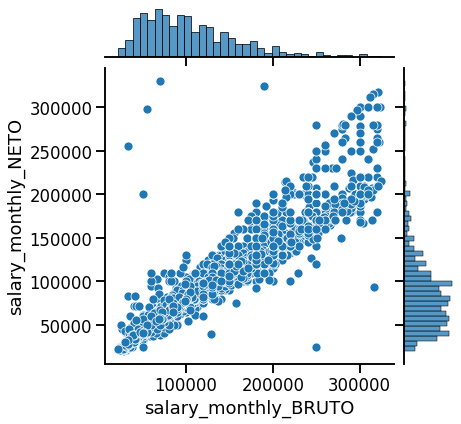

In [59]:
sea.jointplot(
    data=df_selected,
    x="salary_monthly_BRUTO", y="salary_monthly_NETO")

**A simple vista, Vemos claramente que existe una correlación entre ambas variables, a medida que aumenta una variable lo hace la otra. Por otro lado podemos ver que hay gente que tiene un salario neto muy alto y un neto muy bajo, y viceversa. Lo cual no tiene demasiado sentido salvo que parte de su salario no esté declarado.**

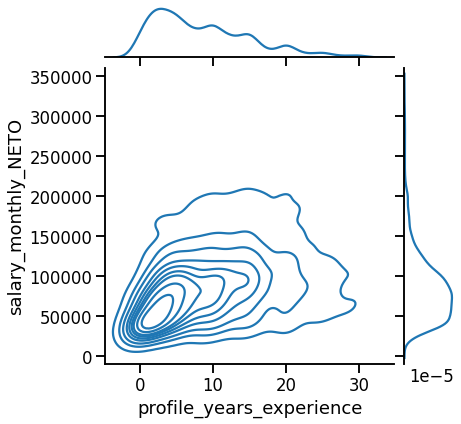

In [60]:
sea.jointplot(
    data=df_selected,
    x="profile_years_experience", y="salary_monthly_NETO",kind='kde')

Acá comparamos la distribución del salario neto vs los años de experiencia. Decidimos utilizar el argumento kind='kde' simplemente para mostrar la densidad de probabilidad de las variables y no el histograma. No podemos ver ninguna correlación entre ambas variables.

Por último un gráfico salary_monthtl_BRUTO vs profile_years_experience sería redundante dado que que el salario bruto mensual y el salario neto mensual están correlacionados.

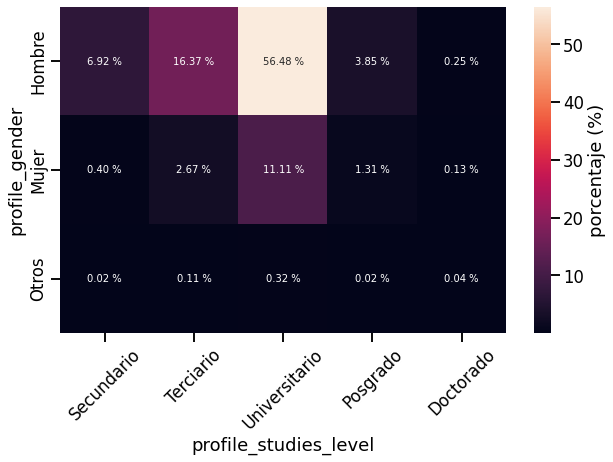

In [61]:
sorted_studies_levels = ['Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado']
fig = plt.figure(figsize=(10,6))
exp = pd.crosstab(df_selected.profile_gender,
                  df_selected.profile_studies_level,normalize=True)[sorted_studies_levels]*100
ax = sea.heatmap(exp, annot=True,cbar_kws={'label': 'porcentaje (%)'}, fmt='.2f')
for t in ax.texts: t.set_text(t.get_text() + " %")

ax.tick_params(axis='x', rotation=45)

En este gráfico muestra el porcentaje de nuestra muestra discriminados por género y por nivel de estudio alcanzado sobre el total para poder ver cómo están distribuidos los dátos de estas dos variables categóricas de interés.

Podemos concluir: 

1- La mayoría de la muestra corresponde a hombres.

2- El 56% de la muestra son hombres que alcanzaron el nivel Universitario.

3- El nivel de estudio alcanzado en general es el Universitario, tanto para hombre como para mujeres y otros.

4- El género otros ocupa un lugar mínimo dentro de la muestra. 

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



**Para ver la correlación podemos hacer un jointplot como describimos anteriormente entre estas dos variables. La medida estadística que utilizaremos será la correlación.**

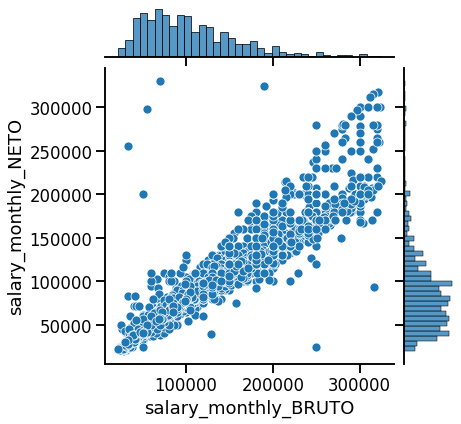

In [62]:
sea.jointplot(
    data=df_selected,
    x="salary_monthly_BRUTO", y="salary_monthly_NETO")

In [63]:
# calculamos la correlacion
corr_bruto_neto = df_selected.salary_monthly_BRUTO.corr(df_selected.salary_monthly_NETO)
print('Correlación:',corr_bruto_neto)






Correlación: 0.9459682036079878


Como el valor de la correlación es cercano a 1 podemos asegurar 
que ambas variables están fuertemente correlacionadas, por lo tanto si excluyeramos la variable salary_monthly_BRUTO de nuestro dataset, el mismo no se veria afectada 

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






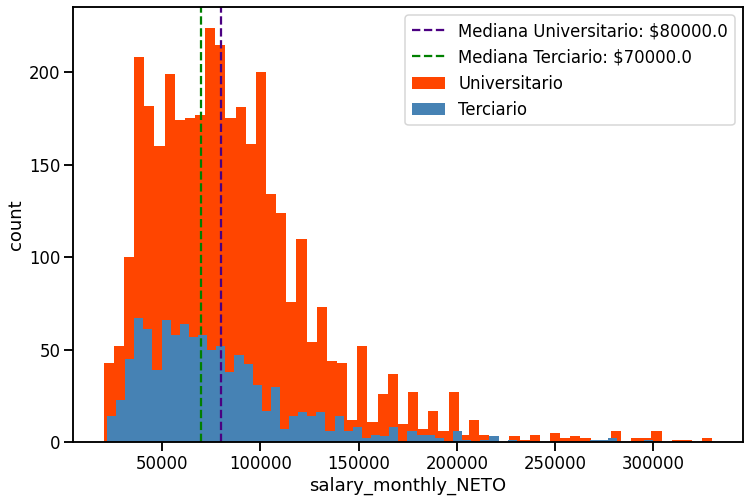

In [64]:
fig = plt.figure(figsize=(12,8))
df_uni = df_selected[df_selected["profile_studies_level"]=="Universitario"]
df_ter = df_selected[df_selected["profile_studies_level"]=="Terciario"]

plt.hist(df_uni.salary_monthly_NETO,color='orangered',bins=60,label='Universitario')
plt.hist(df_ter.salary_monthly_NETO,color='steelblue',bins=60,label='Terciario')

plt.xlabel('salary_monthly_NETO')
plt.ylabel('count')

mediana_uni = df_uni['salary_monthly_NETO'].median()
mediana_ter = df_ter['salary_monthly_NETO'].median()

plt.axvline(mediana_uni, color='indigo', linestyle='--', label=f'Mediana Universitario: ${mediana_uni}')
plt.axvline(mediana_ter, color='green', linestyle='--', label=f'Mediana Terciario: ${mediana_ter}')

plt.legend()
plt.show()

Graficamos de forma comparativa el histograma de las subpoblaciones Universitario y Terciario y vemos que la mediana de los Universitario es mayor que la mediana de los Terciarios.

Las subpoblaciones Universitario y Terciario son posibles valores que puede tomar la variable categórica profile_studies_level. Lo que podemos analizar es qué probabilidad hay de cobrar por encima de la media (incluyendo todas los niveles de estudio) siendo Universitario y siendo Terciario. Lo hacemos a continuación.

In [65]:
mean_selected = df_selected.salary_monthly_NETO.mean()
print(mean_selected)


is_above_avg = df_selected["salary_monthly_NETO"] > mean_selected
len_uni_average = len(df_selected[(df_selected["profile_studies_level"]=="Universitario") & is_above_avg])
len_uni = len(df_selected[df_selected["profile_studies_level"]=="Universitario" ])

p_uni = np.round(len_uni_average/len_uni*100,2)

len_ter_average = len(df_selected[(df_selected["profile_studies_level"]=="Terciario") & is_above_avg])
len_ter = len(df_selected[df_selected["profile_studies_level"]=="Terciario" ])

p_ter = np.round(len_ter_average/len_ter*100,2)



84569.02826284847


La Media del salario NETO total es de: $ 78313.19
La Probabilidad de ganar por encima de la media siendo Universitario es de 48.93%
La Probabilidad de ganar por encima de la media teniendo un titulo terciario es de 37.25%
Por lo tanto hay más probabilidad de ganar por encima de la media siendo Universitario. 

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


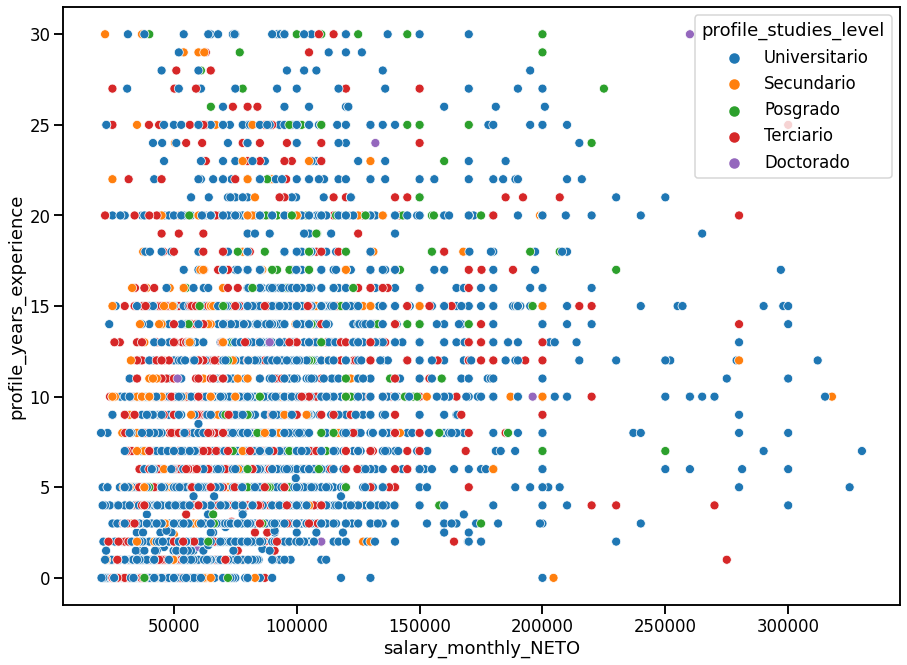

In [66]:
fig = plt.figure(figsize=(15,11))
sea.scatterplot(x=df_selected.salary_monthly_NETO,y=df_selected.profile_years_experience,\
                hue=df_selected.profile_studies_level)

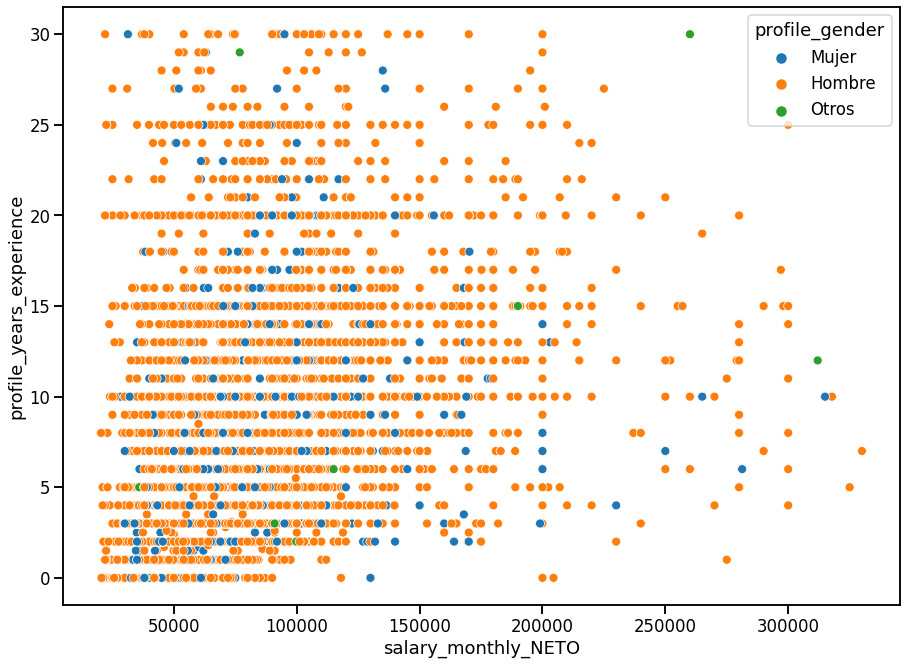

In [67]:

fig = plt.figure(figsize=(15,11))
sea.scatterplot(x=df_selected.salary_monthly_NETO,y=df_selected.profile_years_experience,\
                hue=df_selected.profile_gender)

**De acuerdo con los dos gráficos anteriores ( profile_years_experience vs salary_monthly_NETO y profile_years_experience vs salary_monthly_NETO) vemos que no hay ninguna correlación tanto para la muestra completa como para la misma dicriminada por género y por nivel de estudio, respectivamente.**

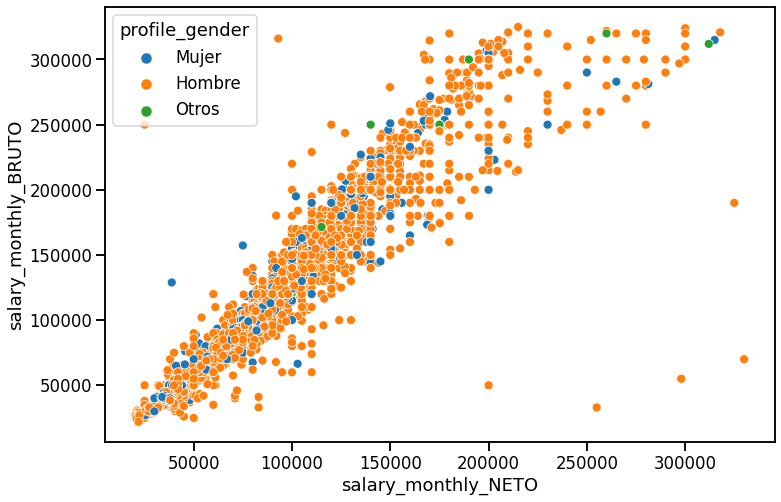

In [68]:
fig = plt.figure(figsize=(12,8))
sea.scatterplot(x=df_selected.salary_monthly_NETO,y=df_selected.salary_monthly_BRUTO,\
                hue=df_selected.profile_gender)

**En este gráfico vemos nuevamente que las variables salary_monthly_NETO y salary_monthly_BRUTO están correlacionadas incluso cuando discriminamos por hombres y por mujeres. Para otros géneros tenemos muy pocos valores y por lo tanto no podemos asegurar correlación alguna para esta subpoblación.**